# Praca domowa 6 – Filimonow Dominika


## Zadanie 1


1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [23]:
median = df.grade.median()
zad_1 = df.loc[df.waterfront == 1].loc[df.grade >= median]
zad_1.price.mean()


1784151.7006802722

Odp: 1,784,151.7006802722

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [116]:
df.loc[df.floors == 2].bathrooms.median() == df.loc[df.floors == 3].bathrooms.median()

True

Odp: Nie

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [83]:
maks = df.lat.max()
minimum = df.lat.min()
w_graniczna =(maks - minimum)/2 + minimum
df.loc[df.lat > w_graniczna].groupby("waterfront").grade.quantile([0.25, 0.75])

waterfront      
0           0.25     7.0
            0.75     8.0
1           0.25     8.0
            0.75    10.0
Name: grade, dtype: float64

Odp: Jeśli nie ma to kwartyl 0.25 = 7, 0.75 = 8. Jeśli ma, to kwartyl 0.25 = 8, 0.75 = 10

4. Pod którym kodem pocztowym jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [111]:
zad_4 = df.groupby(df.zipcode).id.count()
maks = int(zad_4.max())
zad_4 = zad_4.to_frame()
zad_4 = zad_4.index[zad_4.id == maks].tolist()
zad_4_IQR = df.loc[df.zipcode == zad_4[0]].price.quantile(0.75) - df.loc[df.zipcode == zad_4[0]].price.quantile(0.25)

print(f"{zad_4[0]}, {zad_4_IQR}")

98103, 262875.0


Odp: Pod kodem pocztowym 98103, IQR = 262875.0

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [124]:
df.sqft_lot[df.sqft_lot < df.sqft_lot15].count()/df.sqft_lot.count()*100

39.513255910794435

Odp: 39.51 %

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [109]:

maks_lat = df.lat.max()
minimum_lat = df.lat.min()
w_graniczna_lat =(maks_lat - minimum_lat)/2 + minimum_lat

maks_long = df.long.max()
minimum_long = df.long.min()
w_graniczna_long =(maks_long - minimum_long)/2 + minimum_long
# Nie wiem czy dobrze myślę, ale uznaję, że im bardziej minusowa wartość tym dalej na zachód

NW = df.loc[df.lat > w_graniczna_lat].loc[df.long < w_graniczna_long].id.count()
SE = df.loc[df.lat < w_graniczna_lat].loc[df.long > w_graniczna_long].id.count()

((NW - SE)/NW) * 100


99.45780442686738

Odp: O 99.46%

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

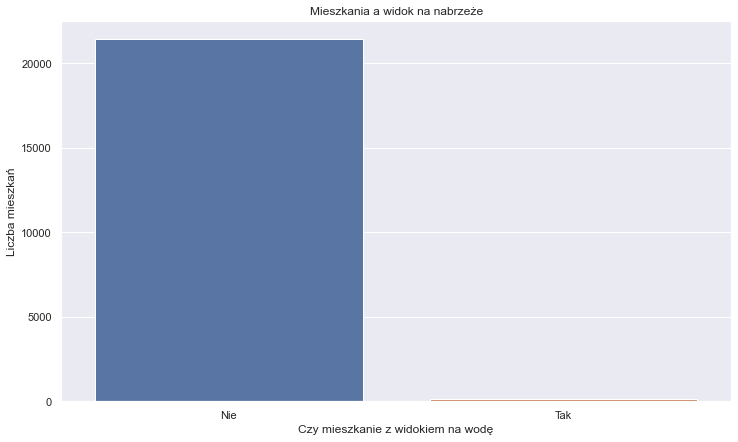

In [39]:
plot_1 = df.groupby("waterfront").count().reset_index()[["waterfront", "id"]].replace(to_replace=(0,1), 
                                                                                      value=("Nie", "Tak"))
plot_1
sns.barplot(data = plot_1, x = "waterfront", y = "id")
plt.xlabel("Czy mieszkanie z widokiem na wodę")
plt.ylabel("Liczba mieszkań")
plt.title("Mieszkania a widok na nabrzeże")
plt.show()


b)

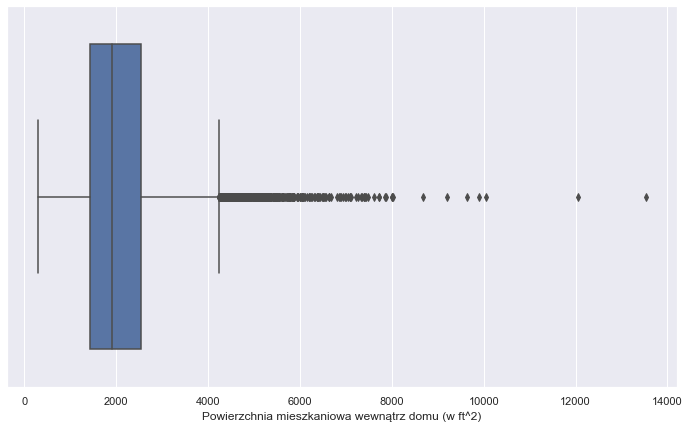

In [42]:
sns.boxplot(data = df, x = "sqft_living")
plt.xlabel("Powierzchnia mieszkaniowa wewnątrz domu (w ft^2)")
plt.show()

c)

<function matplotlib.pyplot.show(close=None, block=None)>

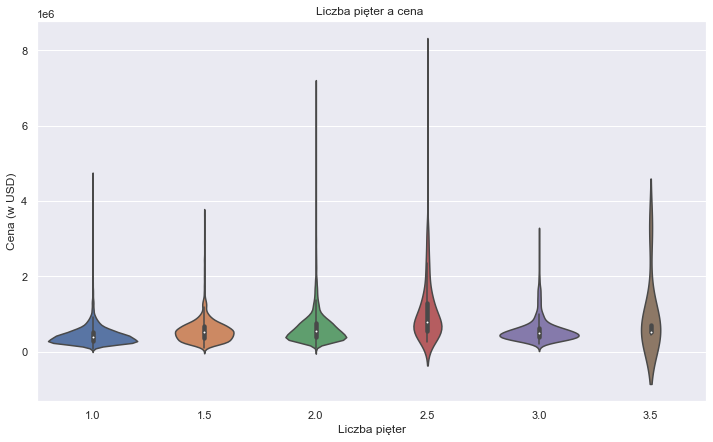

In [51]:
sns.violinplot(data = df, x = "floors", y = "price")

plt.title("Liczba pięter a cena ")
plt.xlabel("Liczba pięter")
plt.ylabel("Cena (w USD)")
plt.show